# Exploración de Datos: Alimentos y Nutrición

Este cuaderno es una exploración y combinación de diferentes visualizaciones que se pueden realizar con archivos CSV. Las visualizaciones se realizan utilizando **Plotly** y **Matplotlib**. Además, se incluyen reflexiones valiosas sobre la calidad de los alimentos que consumimos y los nutrientes que contienen.

## Alimentación y Nutrición
La alimentación y la nutrición son la forma en que obtenemos energía para nuestro cuerpo. Es necesario reponer los nutrientes de nuestro organismo con un nuevo suministro cada día. El agua es un componente fundamental de la nutrición, junto con grasas, proteínas y carbohidratos, todos ellos necesarios. 

La **nutrición** es la ciencia que interpreta los nutrientes y otras sustancias en los alimentos en relación con el mantenimiento, crecimiento, reproducción, salud y enfermedad de un organismo. Incluye procesos como la ingestión, absorción, asimilación, biosíntesis, catabolismo y excreción.

Conocer y comer conscientemente no solo es esencial para un sistema digestivo saludable, sino también para la paz mental. Una dieta rica en vegetales, frutas y granos integrales podría ayudar a prevenir condiciones importantes como accidentes cerebrovasculares, diabetes y enfermedades cardíacas. Sin embargo, con frecuencia disfrutamos de nuestros alimentos favoritos, que no siempre son los más saludables para nuestros cuerpos. Aunque es aceptable darse esos gustos ocasionalmente, este tipo de dietas pueden ser extremadamente dañinas si no se equilibra con alimentos saludables.

## Propósito del Análisis

Este cuaderno analiza los alimentos más comunes disponibles y los datos nutricionales que contienen. A través de estas visualizaciones, se busca generar una comprensión más profunda sobre la calidad de los alimentos y cómo pueden influir en nuestra salud.


# Limpieza de Datos
La limpieza de datos siempre es el primer paso en cualquier proyecto de ciencia de datos. Aunque los datos aquí parecen estar limpios, se requieren algunas modificaciones menores para asegurarnos de que estén completamente preparados para el análisis.
A continuación, importamos las librerías necesarias para el análisis, estas librerías se usarán para manejar los datos, realizar cálculos y crear visualizaciones interactivas y estáticas.

In [3]:
!pip install plotly seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go

In [5]:
nutrients=pd.read_csv("nutrients_csvfile.csv")
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


# Reemplazo de Valores en los Datos

En el conjunto de datos, las letras "t" representan cantidades insignificantes (minúsculas), que pueden interpretarse como cero. Para facilitar el análisis y evitar errores, reemplazaremos todas las instancias de "t" con el valor `0`.


In [6]:

# Reemplazar los valores "t" con 0
nutrients = nutrients.replace("t", 0)
nutrients = nutrients.replace("t'", 0)

# Visualizar las primeras filas del conjunto de datos
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


# Limpieza Adicional de los Datos

En esta sección, eliminaremos expresiones como comas (`,`) del conjunto de datos para que los valores numéricos puedan ser convertidos correctamente a los tipos de datos correspondientes, como enteros (`int`) o flotantes (`float`).

También ajustaremos valores específicos, como en el caso de las calorías en la fila 91, y convertiremos las columnas relacionadas con gramos, calorías, proteínas, grasas, grasas saturadas, fibra y carbohidratos a tipos de datos numéricos.


In [12]:
# Eliminar comas de todo el conjunto de datos
nutrients = nutrients.replace(",", "", regex=True)
# Eliminar valores específicos, como "a", en la columna 'Fiber'
nutrients['Fiber'] = nutrients['Fiber'].replace("a", "", regex=True)
# Ajustar manualmente el valor de calorías en la fila 91 de forma segura
nutrients.loc[91, 'Calories'] = (8 + 44) / 2


In [14]:
#Ahora se convierten los tipos de datos gramos, calorías, proteínas, grasas, grasas saturadas, fibra y carbohidratos tipo de datos int.
nutrients['Grams']=pd.to_numeric(nutrients['Grams'])
nutrients['Calories']=pd.to_numeric(nutrients['Calories'])
nutrients['Protein']=pd.to_numeric(nutrients['Protein'])
nutrients['Fat']=pd.to_numeric(nutrients['Fat'])
nutrients['Sat.Fat']=pd.to_numeric(nutrients['Sat.Fat'])
nutrients['Fiber']=pd.to_numeric(nutrients['Fiber'])
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'])

In [16]:
# usamos nutrients.dtypes para verificar que las conversiones de tipo de dato se han realizado correctamente
nutrients.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

# Verificación Rápida de la Calidad de los Datos

Este paso asegura que los datos están listos para el análisis al realizar las siguientes verificaciones:

1. **Valores Nulos**:
   - Utilizamos `nutrients.isnull().any()` para identificar columnas con datos faltantes (`NaN`).

2. **Estadísticas Descriptivas**:
   - `nutrients.describe()` proporciona estadísticas clave (conteo, media, desviación estándar, valores mínimos y máximos, percentiles) para las columnas numéricas, permitiendo detectar valores atípicos o inconsistencias.

3. **Separadores**:
   - Se incluyen líneas divisorias (`-`) para organizar la salida y mejorar la legibilidad.


In [17]:
print(nutrients.isnull().any())
print('-'*245)
print(nutrients.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories     True
Protein     False
Fat         False
Sat.Fat      True
Fiber        True
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   335.000000   334.000000  335.000000  335.000000  333.000000   
mean    143.211940   188.802395    8.573134    8.540299    6.438438   
std     138.668626   184.453018   17.733722   19.797871   18.517656   
min      11.000000     0.000000   -1.000000    0.000000    0.000000   
25%      60.000000    75.000000    1.000000    0.000000    0.000000   
50%     108.000000   131.000000    3.000000    1.000000    0.000000   
75%     200.000000   250.000000   12.000000   10.000000    8.0000

In [19]:
# Eliminación de Filas con Valores Nulos
#En esta etapa, eliminamos todas las filas que contienen valores nulos (`NaN`) en el DataFrame `nutrients` para asegurarnos de trabajar únicamente con datos completos.
nutrients = nutrients.dropna()
nutrients.shape

(331, 10)

# Uso de los Gráficos KDE en este Dataset

El código proporcionado se utiliza para **visualizar relaciones entre diferentes nutrientes** del conjunto de datos mediante gráficos KDE (Kernel Density Estimate). Estos gráficos permiten analizar la densidad y distribución conjunta de dos variables numéricas.

## Propósito en este Contexto

1. **Análisis Exploratorio**:
   - Los gráficos muestran cómo se distribuyen y relacionan variables clave como carbohidratos, proteínas, grasas, fibra, grasas saturadas y calorías en los alimentos del dataset.

2. **Variables Analizadas**:
   - **Carbs**: Carbohidratos.
   - **Protein**: Proteínas.
   - **Fat**: Grasas.
   - **Fiber**: Fibra.
   - **Sat.Fat**: Grasas saturadas.
   - **Calories**: Calorías.

3. **Objetivo de los Gráficos**:
   - Por ejemplo:
     - **Carbs vs Protein**: Entender cómo se relacionan los carbohidratos y proteínas en diferentes alimentos.
     - **Calories vs Carbs**: Explorar cómo varían las calorías en función de los carbohidratos.
     - **Fat vs Sat.Fat**: Visualizar la relación entre grasas totales y grasas saturadas.

4. **Beneficios**:
   - Identificar patrones, tendencias y correlaciones.
   - Detectar posibles valores atípicos.
   - Obtener una comprensión visual de las interacciones entre nutrientes.

## Resultado Esperado
Estos gráficos ayudan a explorar rápidamente el conjunto de datos, proporcionando una base visual para análisis más profundos o modelado estadístico.


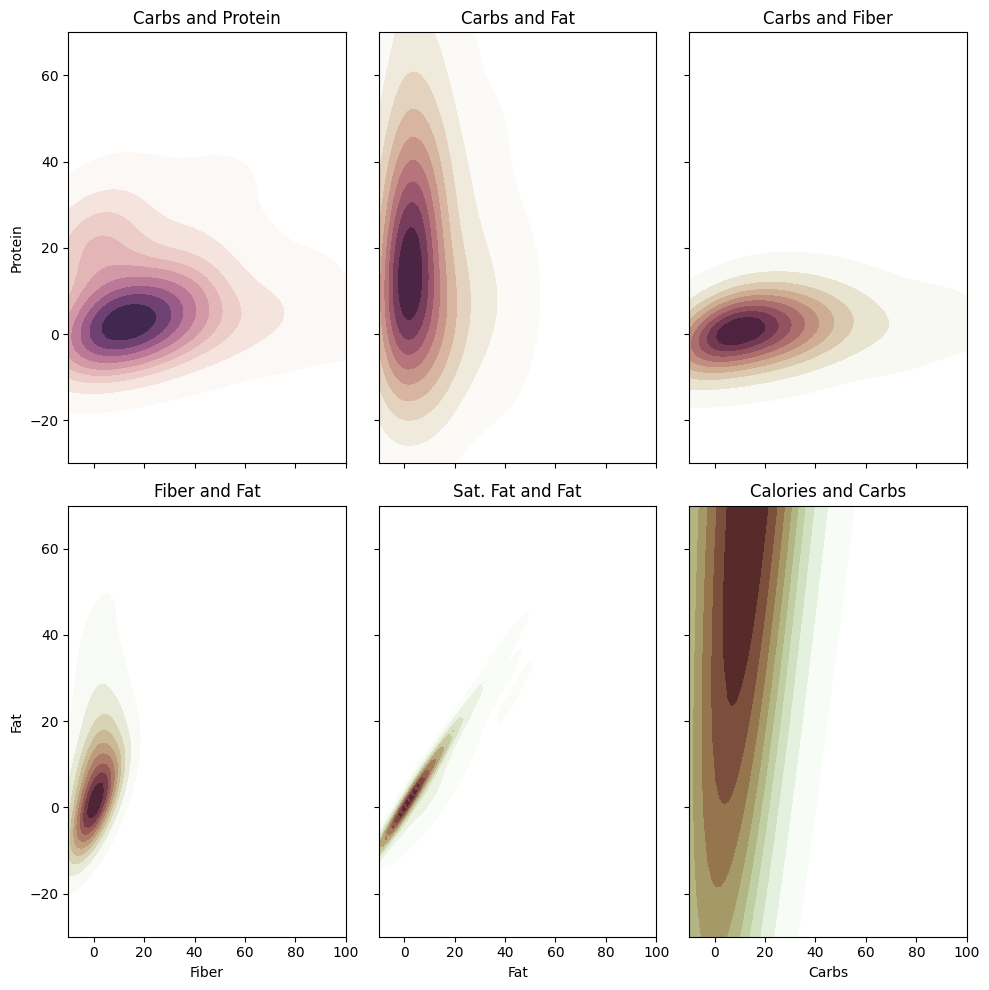

In [24]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear la figura y los ejes para los gráficos
f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

# Paleta de colores inicial
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Gráfico 1: Carbs vs Protein
sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Protein'], cmap=cmap, fill=True, ax=axes[0, 0])
axes[0, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Protein')

# Paleta de colores para el siguiente gráfico
cmap = sns.cubehelix_palette(start=0.25, light=1, as_cmap=True)

# Gráfico 2: Fat vs Carbs
sns.kdeplot(x=nutrients['Fat'], y=nutrients['Carbs'], cmap=cmap, fill=True, ax=axes[0, 1])
axes[0, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fat')

# Paleta de colores para el siguiente gráfico
cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)

# Gráfico 3: Carbs vs Fiber
sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Fiber'], cmap=cmap, fill=True, ax=axes[0, 2])
axes[0, 2].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fiber')

# Paleta de colores para el siguiente gráfico
cmap = sns.cubehelix_palette(start=0.45, light=1, as_cmap=True)

# Gráfico 4: Fiber vs Fat
sns.kdeplot(x=nutrients['Fiber'], y=nutrients['Fat'], cmap=cmap, fill=True, ax=axes[1, 0])
axes[1, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Fiber and Fat')

# Paleta de colores para el siguiente gráfico
cmap = sns.cubehelix_palette(start=0.56, light=1, as_cmap=True)

# Gráfico 5: Fat vs Sat.Fat
sns.kdeplot(x=nutrients['Fat'], y=nutrients['Sat.Fat'], cmap=cmap, fill=True, ax=axes[1, 1])
axes[1, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Sat. Fat and Fat')

# Paleta de colores para el siguiente gráfico
cmap = sns.cubehelix_palette(start=0.68, light=1, as_cmap=True)

# Gráfico 6: Calories vs Carbs
sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Calories'], cmap=cmap, fill=True, ax=axes[1, 2])
axes[1, 2].set(xlim=(-10, 100), ylim=(-30, 70), title='Calories and Carbs')

# Ajustar el diseño de la figura
f.tight_layout()


# Análisis de Métricas Individuales: Alimentos Ricos en Proteína

En esta sección, identificaremos los alimentos más ricos en proteínas dentro de las categorías de vegetales, granos, cereales, semillas y frutos secos. 

## Proceso

1. **Filtrado por Categorías**:
   - Se seleccionan los alimentos que pertenecen a las siguientes categorías:
     - Vegetales (A-E, F-P, R-Z).
     - Cereales, panes y comida rápida a base de granos.
     - Semillas y frutos secos.

2. **Ordenación**:
   - Se ordenan los alimentos de estas categorías según su contenido de proteína en orden descendente.

3. **Visualización**:
   - Se seleccionan los 20 alimentos más ricos en proteínas y se genera un gráfico de barras interactivo para mostrar los resultados.


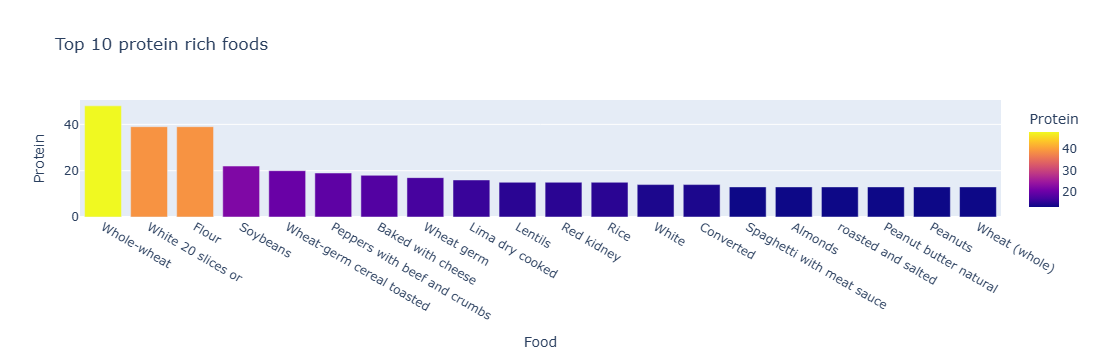

In [28]:
alls=['Vegetables A-E',
 'Vegetables F-P',
 'Vegetables R-Z','Breads cereals fastfoodgrains','Seeds and Nuts']

prot= nutrients[nutrients['Category'].isin(alls)]

protein_rich= prot.sort_values(by='Protein', ascending= False)
top_20=protein_rich.head(20)
fig = px.bar(top_20, x='Food', y='Protein', color='Protein', title=' Top 10 protein rich foods')
fig.show()

Por lo tanto, de la categoría de Granos, Verduras y Semillas, el trigo integral es el que tiene mayor contenido de proteínas, seguido del pan blanco. La soja también se encuentra entre los 20 primeros. Además, las almendras ocupan el puesto número 1 en la categoría de Semillas.🌱

# Análisis de Alimentos con Más Calorías

En esta sección, identificaremos los alimentos que contienen la mayor cantidad de calorías, lo cual puede ser útil para evitar alimentos poco saludables o excesivamente calóricos.

## Proceso

1. **Ordenación**:
   - Se ordena el conjunto de datos por la columna `Calories` en orden descendente para identificar los alimentos con más calorías.

2. **Selección**:
   - Se seleccionan los 20 alimentos más calóricos del conjunto de datos.

3. **Visualización**:
   - Se genera un gráfico de barras interactivo que muestra estos alimentos junto con sus valores calóricos.


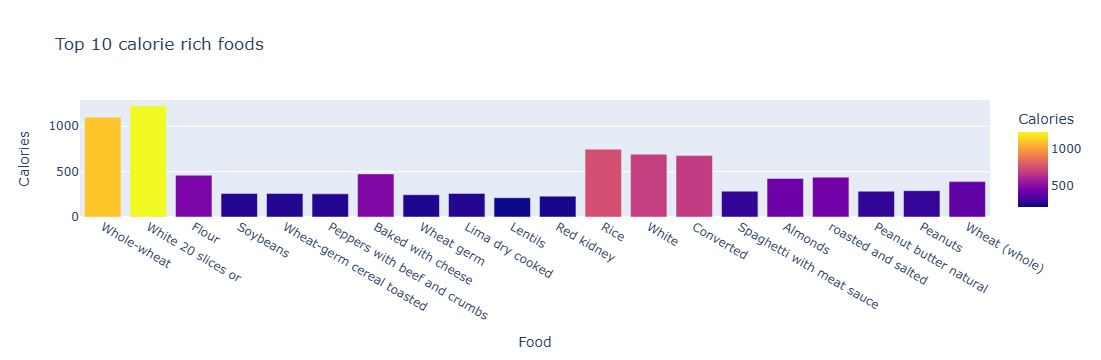

In [29]:
cals= nutrients.sort_values(by='Calories', ascending= False)
top_20_cals=cals.head(20)
fig = px.bar(top_20, x='Food', y='Calories' , color='Calories',title=' Top 10 calorie rich foods')
fig.show()

La leche fortificada es la que tiene más calorías, seguida del pan blanco. Además, observe cómo el trigo integral tiene la mayor cantidad de proteínas, pero tiene casi la misma cantidad de calorías. La manteca de cerdo es la fuente de grasa con más calorías y 1/2 taza de helado encabeza la lista en la categoría de postres.

## Contenido de grasa
Normalmente, las fuentes de grasa suelen ser menospreciadas, pero se necesita cierta cantidad de grasa para tener un intestino sano. Veamos algunos alimentos grasos.

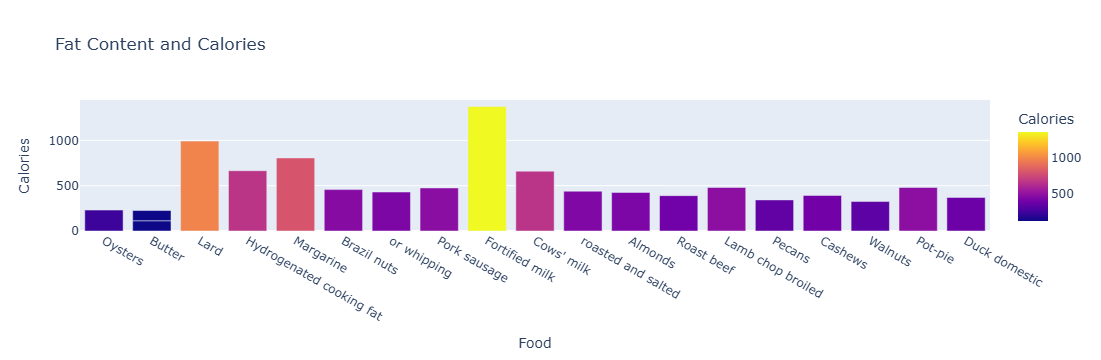

In [31]:
fats= nutrients.sort_values(by='Fat', ascending= False)
top_20_fat=fats.head(20)
fig = px.bar(top_20_fat, x='Food', y='Calories', color='Calories', title=' Fat Content and Calories')
fig.show()

Por lo tanto, las ostras y la mantequilla tienen la mayor combinación de calorías y grasas, seguidas de la manteca de cerdo.

# Análisis por Categorías

Agrupar los datos en categorías nos permite calcular métricas totales, como calorías, proteínas, grasas, carbohidratos, etc., para cada categoría de alimentos. Esto facilita identificar tendencias y patrones en el conjunto de datos.

## Proceso

1. **Agrupación por Categorías**:
   - Utilizamos la columna `Category` para agrupar los datos.
   - Calculamos la suma total de las métricas numéricas (como calorías, proteínas, grasas, etc.) dentro de cada categoría.

2. **Análisis**:
   - Este agrupamiento ayuda a analizar el contenido nutricional acumulado por tipo de alimento, como vegetales, granos, carnes, etc.


In [33]:
# Agrupar los datos por categoría y calcular la suma total de métricas
category_dist = nutrients.groupby(['Category']).sum()

# Mostrar el resultado
category_dist

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,,,
Breads cereals fastfoodgrains,BiscuitsBran flakesBread cracked wheatRyeWhite...,11 cup1 slice1 slice1-lb. loaf1-lb. loaf1 slic...,5253,11921.0,403,207,99.0,115.91,2059.0
Dairy products,Cows' milkMilk skimButtermilkEvaporated undilu...,1 qt.1 qt.1 cup1 cup6 cups1 cup1 1/3 cups2/3 c...,7412,8434.0,503,396,322.0,4.40,651.0
Desserts sweets,Apple bettyBread puddingCakesChocolate fudgeCu...,1 serving3/4 cup1 slice1 slice11 slice1 slice1...,2958,6608.0,78,163,150.0,20.50,1184.0
DrinksAlcohol Beverages,BeerGinWinesTable (12.2% alcohol)Carbonated dr...,2 cups1 oz.1/2 cup1/2 cup12 oz.12 oz.12 oz.12 ...,3284,1112.0,0,0,0.0,0.00,167.0
Fats Oils Shortenings,YolksButterButterButterHydrogenated cooking fa...,21T.1/2 cup1/4 lb.1/2 cup1/2 cup1/2 cup1 T.1 T...,695,3629.0,234,631,536.0,234.00,239.0
Fish Seafood,ClamsCodCrab meatFish sticks friedFlounderHadd...,3 oz.3 1/2 oz.3 oz.53 1/2 oz.3 oz.3 1/2 oz.1 s...,1807,2757.0,588,338,252.0,235.00,263.0
Fruits A-F,Watercress stems rawApple juice cannedApple vi...,1 cup1 cup1/3 cup1 med1 cup1 cup1/2 cup3 med.1...,3844,3328.0,29,20,12.0,33.50,812.0
Fruits G-P,"Grapefruit sectionsGrapefruit fresh 5"" diamete...",1 cup1/21 cup1 cup1 cup1 cup1/2 cup6-oz. can6-...,5412,4054.0,28,25,21.0,21.10,1009.0
Fruits R-Z,RaisinsRaspberriesRaw redRhubarb sweetenedStra...,1/2 cup1/2 cup3/4 cup1 cup1 cup1 cupI med.1 wedge,1973,1228.0,7,1,0.0,17.40,330.0


# Distribución de Métricas por Categorías

En esta sección, se analiza la distribución de las principales métricas nutricionales (calorías, grasas, proteínas, fibra, grasas saturadas y carbohidratos) agrupadas por categoría. Los resultados se visualizan con gráficos de pastel para cada métrica.

## Proceso

1. **Agrupación por Categorías**:
   - Los datos se agrupan utilizando la columna `Category` y se calcula la suma de cada métrica (calorías, grasas, proteínas, etc.) por categoría.

2. **Visualización**:
   - Se generan gráficos de pastel para mostrar cómo se distribuyen estas métricas entre las diferentes categorías.
   - Cada métrica (calorías, grasas, etc.) tiene su propio gráfico en una disposición de 2 filas y 3 columnas.

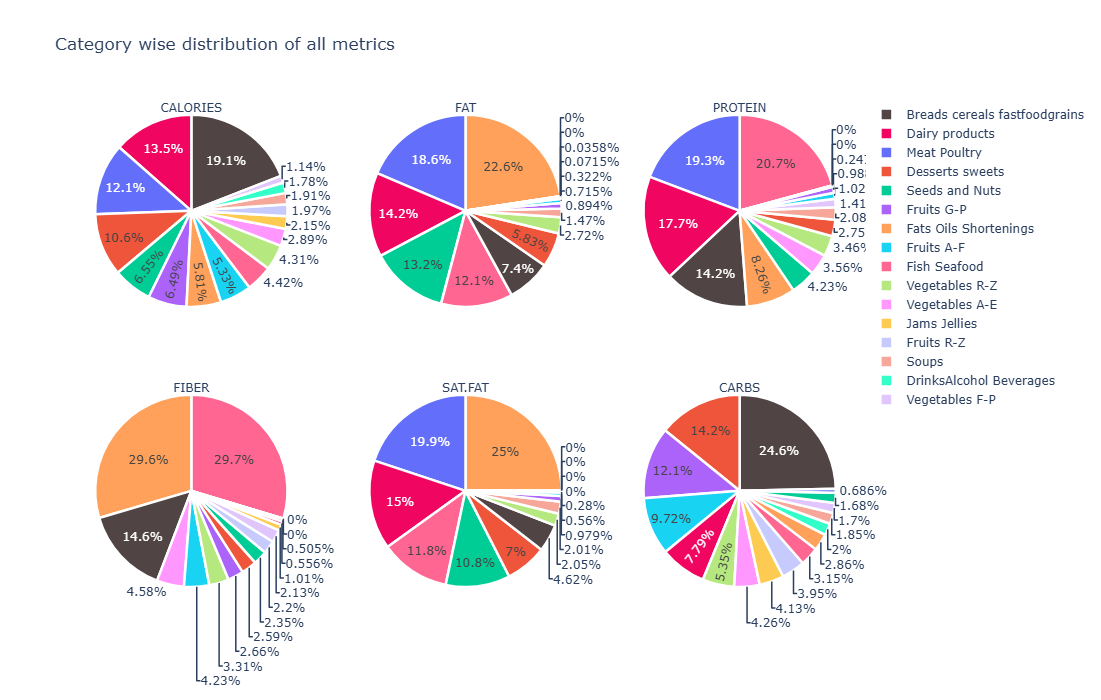

In [34]:
category_dist=nutrients.groupby(['Category']).sum()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

fig.show()

Algunas inferencias de los gráficos circulares anteriores:
Es claro que los panes, granos y cereales tienen la mayor cantidad de carbohidratos y calorías.
El mayor porcentaje de proteínas se encuentra en los mariscos
Sorprendentemente, la misma cantidad de contenido de fibra está presente en las grasas y los mariscos.
Las semillas y los frutos secos tienen aproximadamente un 14% de contenido de grasa.
Las frutas no tienen un gran porcentaje en ninguna de las categorías excepto los carbohidratos, tienen aproximadamente un 10% de carbohidratos.
Los productos lácteos (15%) tienen más contenido de grasas saturadas que los mariscos (11,8%).

# Análisis de Carnes, Aves y Mariscos

En esta sección, se identifican los alimentos con mayor contenido de proteínas dentro de las categorías de carnes, aves y mariscos. El objetivo es destacar los alimentos más ricos en proteínas de estas categorías.

## Proceso

1. **Filtrado de Datos**:
   - Se seleccionan únicamente los alimentos que pertenecen a las categorías `Fish Seafood` (Pescados y Mariscos) y `Meat Poultry` (Carnes y Aves).

2. **Selección de los Más Proteicos**:
   - Se ordenan los alimentos de estas categorías por su contenido en proteínas en orden descendente.
   - Se seleccionan los 10 alimentos con mayor contenido de proteínas.

3. **Visualización**:
   - Se genera un gráfico de pastel que muestra los alimentos seleccionados y sus proporciones de proteína.


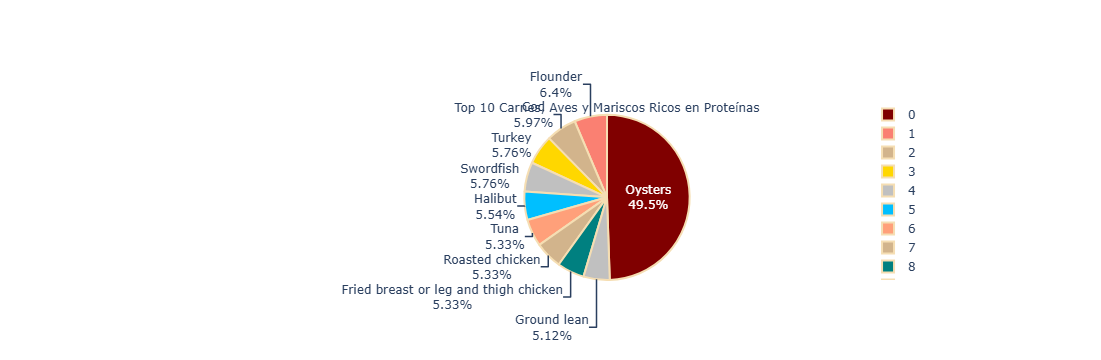

In [36]:
# Filtrar las categorías de carnes, aves y mariscos
meat = nutrients[nutrients['Category'].isin(['Fish Seafood', 'Meat Poultry'])]

# Ordenar por contenido de proteínas y seleccionar los 10 más altos
meats_top = meat.sort_values(by='Protein', ascending=False).head(10)

# Crear gráfico de pastel para los alimentos ricos en proteínas
import plotly.graph_objects as go

fig = go.Figure(go.Pie(
    values=meats_top['Protein'].values,
    text=meats_top['Food'],
    title={"text": "Top 10 Carnes, Aves y Mariscos Ricos en Proteínas"},
    marker={
        "colors": ["maroon", "salmon", "tan", "gold", "silver", "deepskyblue", "lightsalmon", "tan", "teal", "silver"],
        "line": {"color": "wheat", "width": 2}
    }
))

fig.show()

# Análisis de Carnes y Mariscos con Alto Contenido de Grasas

Los mariscos y las carnes son conocidos por su buen contenido de grasas, especialmente en ciertas variedades de pescados. En esta sección, identificaremos los alimentos con mayor contenido de grasas dentro de estas categorías.

## Proceso

1. **Filtrado de Datos**:
   - Seleccionamos los alimentos de las categorías `Fish Seafood` y `Meat Poultry`.

2. **Ordenación por Contenido de Grasas**:
   - Ordenamos los alimentos por la cantidad de grasa en orden descendente.
   - Seleccionamos los 10 alimentos con mayor contenido de grasa.

3. **Visualización**:
   - Se genera un gráfico de dispersión que muestra los alimentos seleccionados junto con su contenido de grasa.

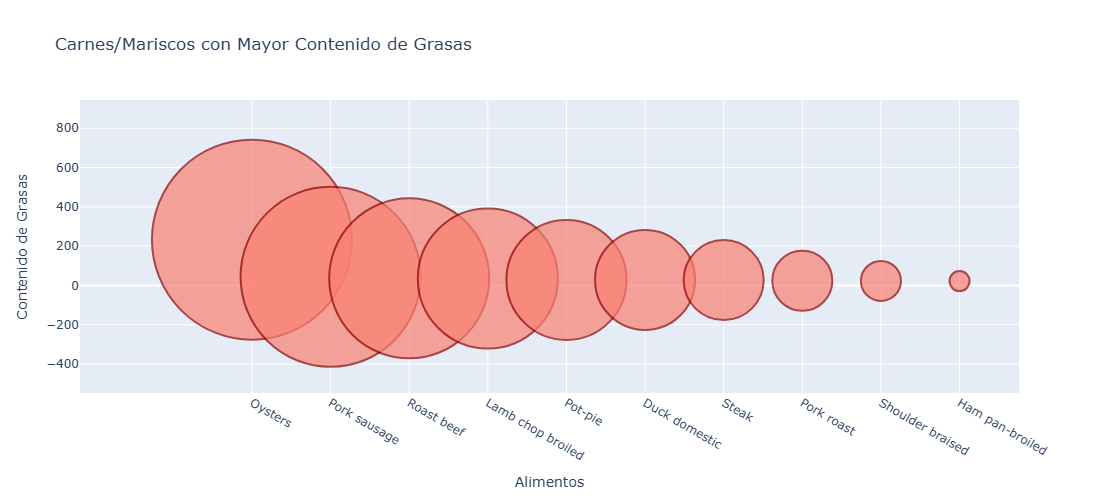

In [37]:
# Seleccionar los 10 alimentos más grasosos
top_10_fattest = meat.sort_values(by='Fat', ascending=False).head(10)

# Crear gráfico de dispersión
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=top_10_fattest['Food'], 
    y=top_10_fattest['Fat'],
    mode='markers',
    marker=dict(
        size=[200, 180, 160, 140, 120, 100, 80, 60, 40, 20],  # Tamaño de los marcadores
        color='salmon',  # Color de los puntos
        line=dict(width=2, color='darkred')  # Borde de los marcadores
    )
)])

# Actualizar diseño del gráfico
fig.update_layout(
    title='Carnes/Mariscos con Mayor Contenido de Grasas',
    xaxis_title='Alimentos',
    yaxis_title='Contenido de Grasas',
    height=500,
    width=800
)

fig.show()

# Análisis de Carnes y Mariscos con Mayor Contenido de Fibra

Aunque las carnes y mariscos no son típicamente ricos en fibra, algunos alimentos pueden tener un contenido significativo. En esta sección, identificaremos las carnes y mariscos con mayor contenido de fibra.

## Proceso

1. **Filtrado de Datos**:
   - Se utilizan las categorías `Fish Seafood` y `Meat Poultry` para analizar alimentos específicos.

2. **Ordenación por Contenido de Fibra**:
   - Los alimentos se ordenan en función de su contenido de fibra en orden descendente.
   - Se seleccionan los 10 alimentos con mayor contenido de fibra.

3. **Inspección del Resultado**:
   - Mostramos una tabla con los alimentos seleccionados y sus respectivos valores de fibra


In [38]:
# Seleccionar los 10 alimentos con mayor contenido de fibra
top_10_fibrous = meat.sort_values(by='Fiber', ascending=False).head(10)

# Mostrar los resultados
top_10_fibrous

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
82,Oysters,6-8 med.,230,231.0,232,233,234.0,235.0,236.0,Fish Seafood
43,Bacon,2 slices,16,95.0,4,8,7.0,0.0,1.0,Meat Poultry
78,Halibut,3 1/2 oz.,100,182.0,26,8,0.0,0.0,0.0,Fish Seafood
69,Turkey,3 1/2 oz.,100,265.0,27,15,0.0,0.0,0.0,Meat Poultry
70,Veal,3 oz.,85,185.0,23,9,8.0,0.0,0.0,Meat Poultry
71,Roast,3 oz.,85,305.0,13,14,13.0,0.0,0.0,Meat Poultry
72,Clams,3 oz.,85,87.0,12,1,0.0,0.0,2.0,Fish Seafood
73,Cod,3 1/2 oz.,100,170.0,28,5,0.0,0.0,0.0,Fish Seafood
74,Crab meat,3 oz.,85,90.0,14,2,0.0,0.0,1.0,Fish Seafood
75,Fish sticks fried,5,112,200.0,19,10,5.0,0.0,8.0,Fish Seafood


# Introducción a los Gráficos de Dispersión 3D

Los gráficos de dispersión 3D permiten representar datos en tres ejes (X, Y, Z) para mostrar relaciones entre tres variables. En este caso, se utiliza para visualizar la relación entre:
- **Categoría de alimentos** (eje X),
- **Nombres de los alimentos** (eje Y),
- **Contenido de grasa** (eje Z).

Aunque estos gráficos no siempre generan inferencias profundas, son visualmente atractivos y pueden ofrecer una perspectiva única de los datos.

## Proceso

1. **Variables Elegidas**:
   - Eje X: `Category` (Categoría del alimento).
   - Eje Y: `Food` (Nombre del alimento).
   - Eje Z: `Fat` (Contenido de grasa).

2. **Configuración del Gráfico**:
   - Cada marcador representa un alimento.
   - El tamaño y color del marcador reflejan el contenido de grasa.
   - Se utiliza una barra de colores para indicar los valores de grasa.

3. **Visualización**:
   - Se crea un gráfico interactivo en 3D usando Plotly.


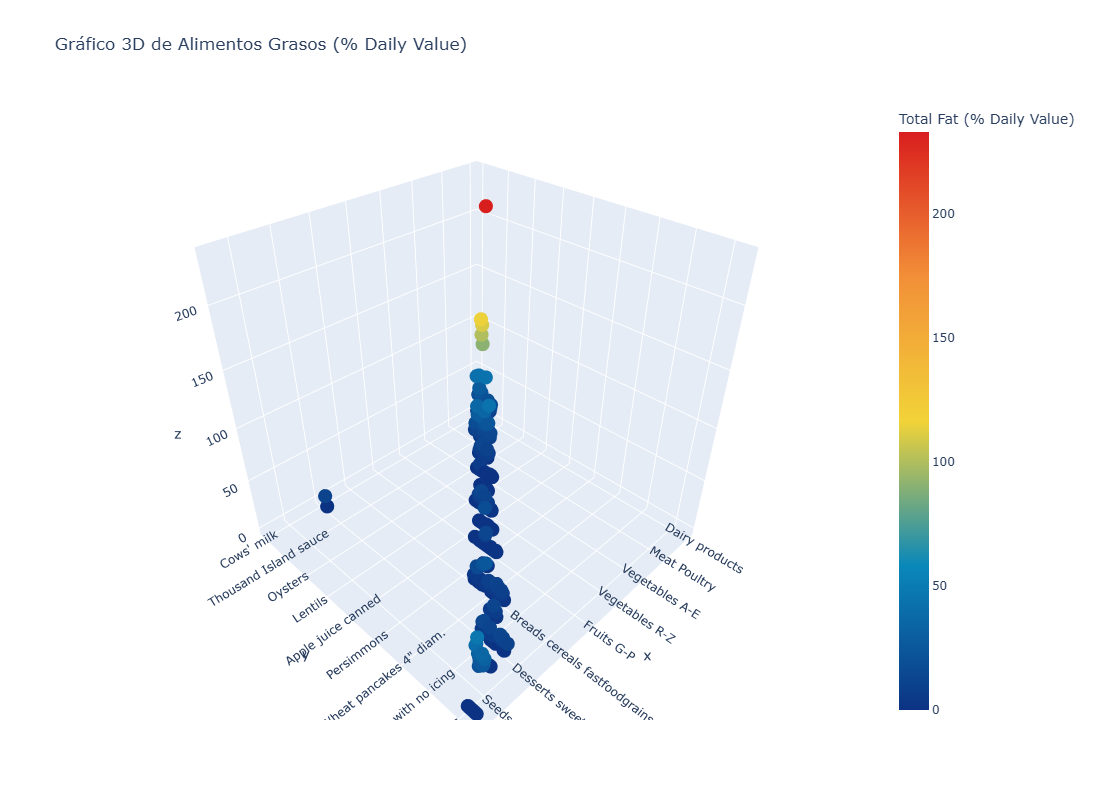

In [40]:
import plotly.graph_objects as go
import plotly.offline as py

# Crear un gráfico 3D de dispersión
trace1 = go.Scatter3d(
    x=nutrients['Category'].values,  # Eje X
    y=nutrients['Food'].values,      # Eje Y
    z=nutrients['Fat'].values,       # Eje Z
    text=nutrients['Food'].values,   # Información adicional al pasar el ratón
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=750,  # Escala del tamaño de los marcadores
        color=nutrients['Fat'].values,  # Colorear según contenido de grasa
        colorscale='Portland',  # Paleta de colores
        colorbar=dict(title='Total Fat (% Daily Value)'),  # Barra de colores
        line=dict(color='rgb(255, 255, 255)')  # Borde blanco en marcadores
    )
)

# Configurar el diseño del gráfico
data = [trace1]
layout = dict(
    height=800,
    width=800,
    title='Gráfico 3D de Alimentos Grasos (% Daily Value)'
)

# Combinar datos y diseño
fig = dict(data=data, layout=layout)

# Mostrar gráfico interactivo
py.iplot(fig, filename='3DBubble')

# Gráfico de Dispersión 3D para Alimentos Ricos en Carbohidratos

En esta sección, utilizaremos un gráfico de dispersión 3D para visualizar los alimentos ricos en carbohidratos dentro del conjunto de datos.

## Proceso

1. **Variables Elegidas**:
   - **Eje X**: `Category` (Categoría del alimento).
   - **Eje Y**: `Food` (Nombre del alimento).
   - **Eje Z**: `Carbs` (Contenido de carbohidratos).

2. **Configuración del Gráfico**:
   - Cada marcador representa un alimento.
   - El tamaño y color del marcador reflejan el contenido de carbohidratos.
   - La barra de colores muestra el valor de carbohidratos.

3. **Visualización**:
   - Se crea un gráfico interactivo en 3D usando Plotly para representar alimentos con alto contenido de carbohidratos.



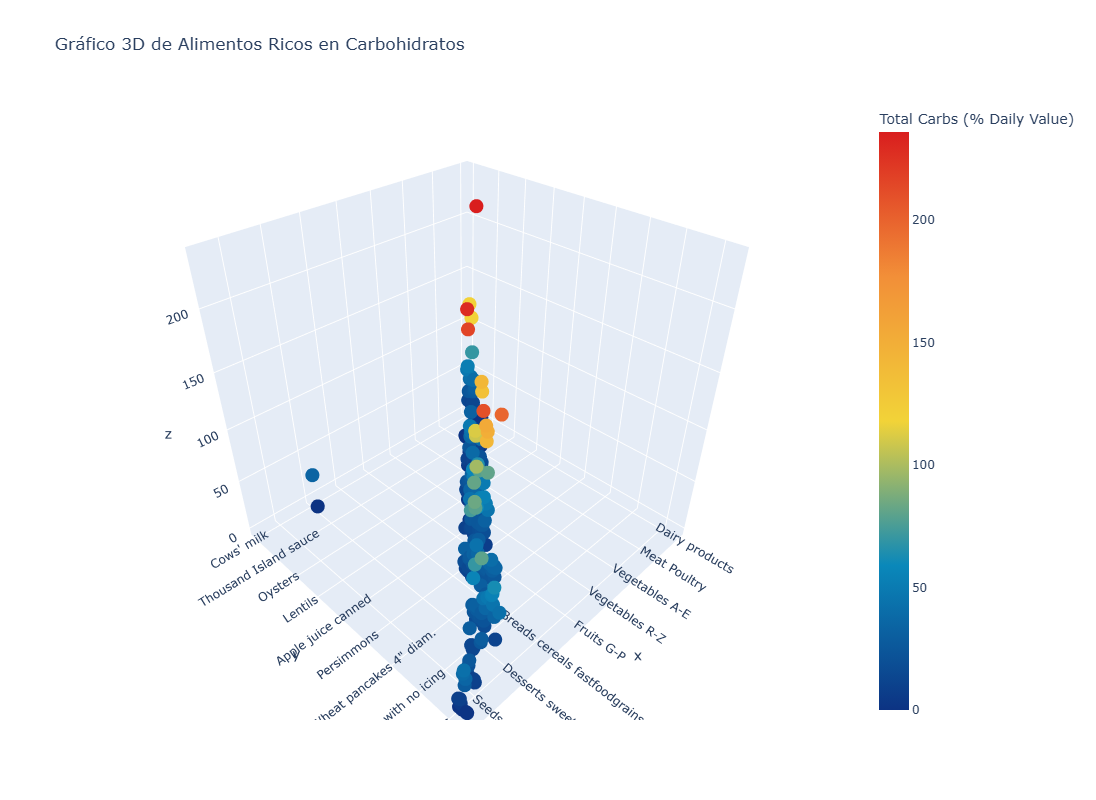

In [42]:
import plotly.graph_objects as go
import plotly.offline as py

# Crear un gráfico 3D de dispersión para alimentos ricos en carbohidratos
trace1 = go.Scatter3d(
    x=nutrients['Category'].values,  # Eje X: Categorías
    y=nutrients['Food'].values,      # Eje Y: Nombres de alimentos
    z=nutrients['Carbs'].values,     # Eje Z: Contenido de carbohidratos
    text=nutrients['Food'].values,   # Información adicional al pasar el ratón
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=750,  # Escala del tamaño de los marcadores
        color=nutrients['Carbs'].values,  # Colorear según contenido de carbohidratos
        colorscale='Portland',  # Paleta de colores
        colorbar=dict(title='Total Carbs (% Daily Value)'),  # Barra de colores
        line=dict(color='rgb(255, 255, 255)')  # Borde blanco en marcadores
    )
)

# Configurar el diseño del gráfico
data = [trace1]
layout = dict(
    height=800,
    width=800,
    title='Gráfico 3D de Alimentos Ricos en Carbohidratos'
)

# Combinar datos y diseño
fig = dict(data=data, layout=layout)

# Mostrar gráfico interactivo
py.iplot(fig, filename='3DBubble')


# Grupo de Alimentos con Mayor Contenido Calórico

En esta sección, analizamos qué grupo de alimentos tiene el mayor contenido calórico mediante un gráfico de caja y bigotes extendido (*boxen plot*). Este tipo de gráfico es ideal para representar distribuciones y detectar valores atípicos.

## Proceso

1. **Configuración del Estilo**:
   - Usamos `seaborn` para establecer un estilo limpio y claro.

2. **Visualización con Boxen Plot**:
   - El eje X muestra las categorías de alimentos.
   - El eje Y representa el contenido total de calorías.
   - Los colores y la transparencia mejoran la estética y claridad del gráfico.

3. **Personalización del Gráfico**:
   - Títulos, etiquetas de ejes y tamaño de las fuentes optimizados para mejorar la presentación.
   - Rotación de etiquetas en el eje X para mejorar la legibilidad.



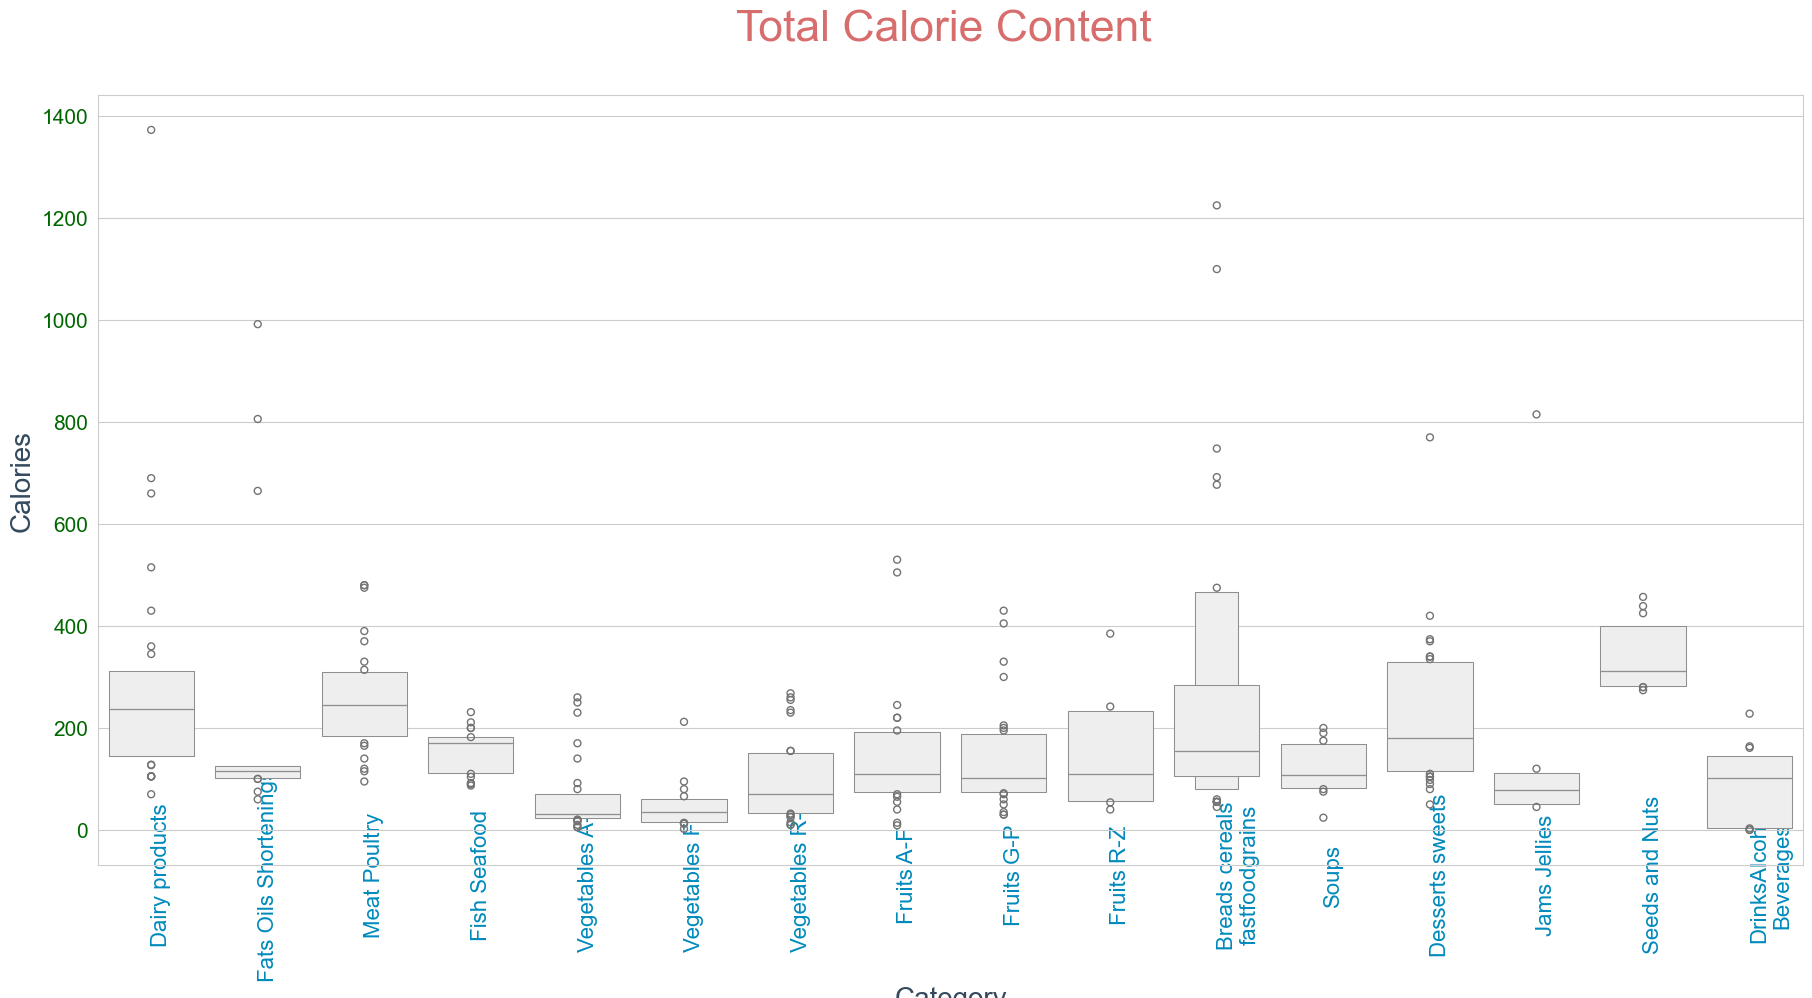

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo
sns.set_style("whitegrid")
plt.figure(figsize=(22, 10))

# Crear el gráfico de boxen plot
ax = sns.boxenplot(
    x="Category", 
    y="Calories", 
    data=nutrients, 
    color='#eeeeee'  # Color aplicado directamente sin usar `palette`
)

# Agregar transparencia a los colores
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.9))

# Configuración del gráfico
plt.title("Total Calorie Content \n", loc="center", size=32, color='#be0c0c', alpha=0.6)
plt.xlabel('Category', color='#34495E', fontsize=20)
plt.ylabel('Calories', color='#34495E', fontsize=20)
plt.xticks(size=16, color='#008abc', rotation=90, wrap=True)
plt.yticks(size=15, color='#006600')

# Mostrar el gráfico
plt.show()


# Conclusiones del Análisis: Nutrientes y Necesidades Básicas

Este cuaderno fue un intento de visualizar y analizar datos que forman parte de la vida cotidiana de todas las personas. Exploramos nuestras necesidades básicas en términos de nutrientes, utilizando diversas técnicas y herramientas de análisis de datos.

 **Visualizaciones**:
   - **Gráficos de Barras Interactivos (Plotly)**:
     - Identificamos los alimentos más ricos en proteínas, calorías, grasas y carbohidratos.
     - Utilizamos colores y tamaños para resaltar tendencias clave en los datos.
   - **Gráficos de Dispersión 3D (Plotly)**:
     - Mostramos relaciones complejas entre categorías, alimentos y métricas nutricionales en gráficos tridimensionales.
     - Estos gráficos facilitaron la comprensión visual de patrones que no serían evidentes en 2D.
   - **Gráficos de Caja Extendidos (*Boxen Plot*)**:
     - Analizamos la distribución del contenido calórico en diferentes categorías, identificando rangos, medianas y valores atípicos.


## Reflexiones

- **Relevancia de los Nutrientes**:
  Este análisis subraya la importancia de entender los nutrientes en nuestra dieta diaria. La calidad y cantidad de proteínas, grasas, carbohidratos y fibra afectan directamente nuestra salud y bienestar.

- **Visualización como Herramienta de Análisis**:
  Las visualizaciones interactivas no solo son visualmente atractivas, sino que también facilitan el descubrimiento de patrones y tendencias ocultas en grandes conjuntos de datos.

## Conclusión Final

Este cuaderno fue un esfuerzo por combinar ciencia de datos y visualización para analizar nuestras necesidades básicas en términos de nutrientes. A través de técnicas modernas de análisis y herramientas avanzadas, demostramos cómo los datos pueden ser interpretados para tener un impacto positivo en nuestra vida diaria.
